# Reading and Understanding data

In [1311]:
# import warnings
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [1312]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
-
pd.set_option("display.max_columns",2000)
pd.set_option("display.max_rows",85)

In [1313]:
# Reading file
house=pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1314]:
# shape
house.shape

(1460, 81)

In [1315]:
# checking data types
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1316]:
# checking statistics
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1317]:
# checking null values
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1318]:
# missing values in percentage
missing_val=round(100*(house.isnull().sum()/len(house)),2)
missing_val

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1319]:
# here we will see very large number of missing values
large_missing=missing_val[missing_val>45].keys()
large_missing

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [1320]:
# these columns have very large number of missing values so we will drop them 
house.drop(columns=large_missing,axis=1,inplace=True)

In [1321]:
# checking the shape after dropping
house.shape

(1460, 76)

# EDA

### Continous variables

In [1322]:
# we will segregate the numerical columns from our data.
house_num=house.select_dtypes(include=['int64','float64'])
house_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [1323]:
# chcking the shape of numerical columns
house_num.shape

(1460, 38)

### Scatterplot

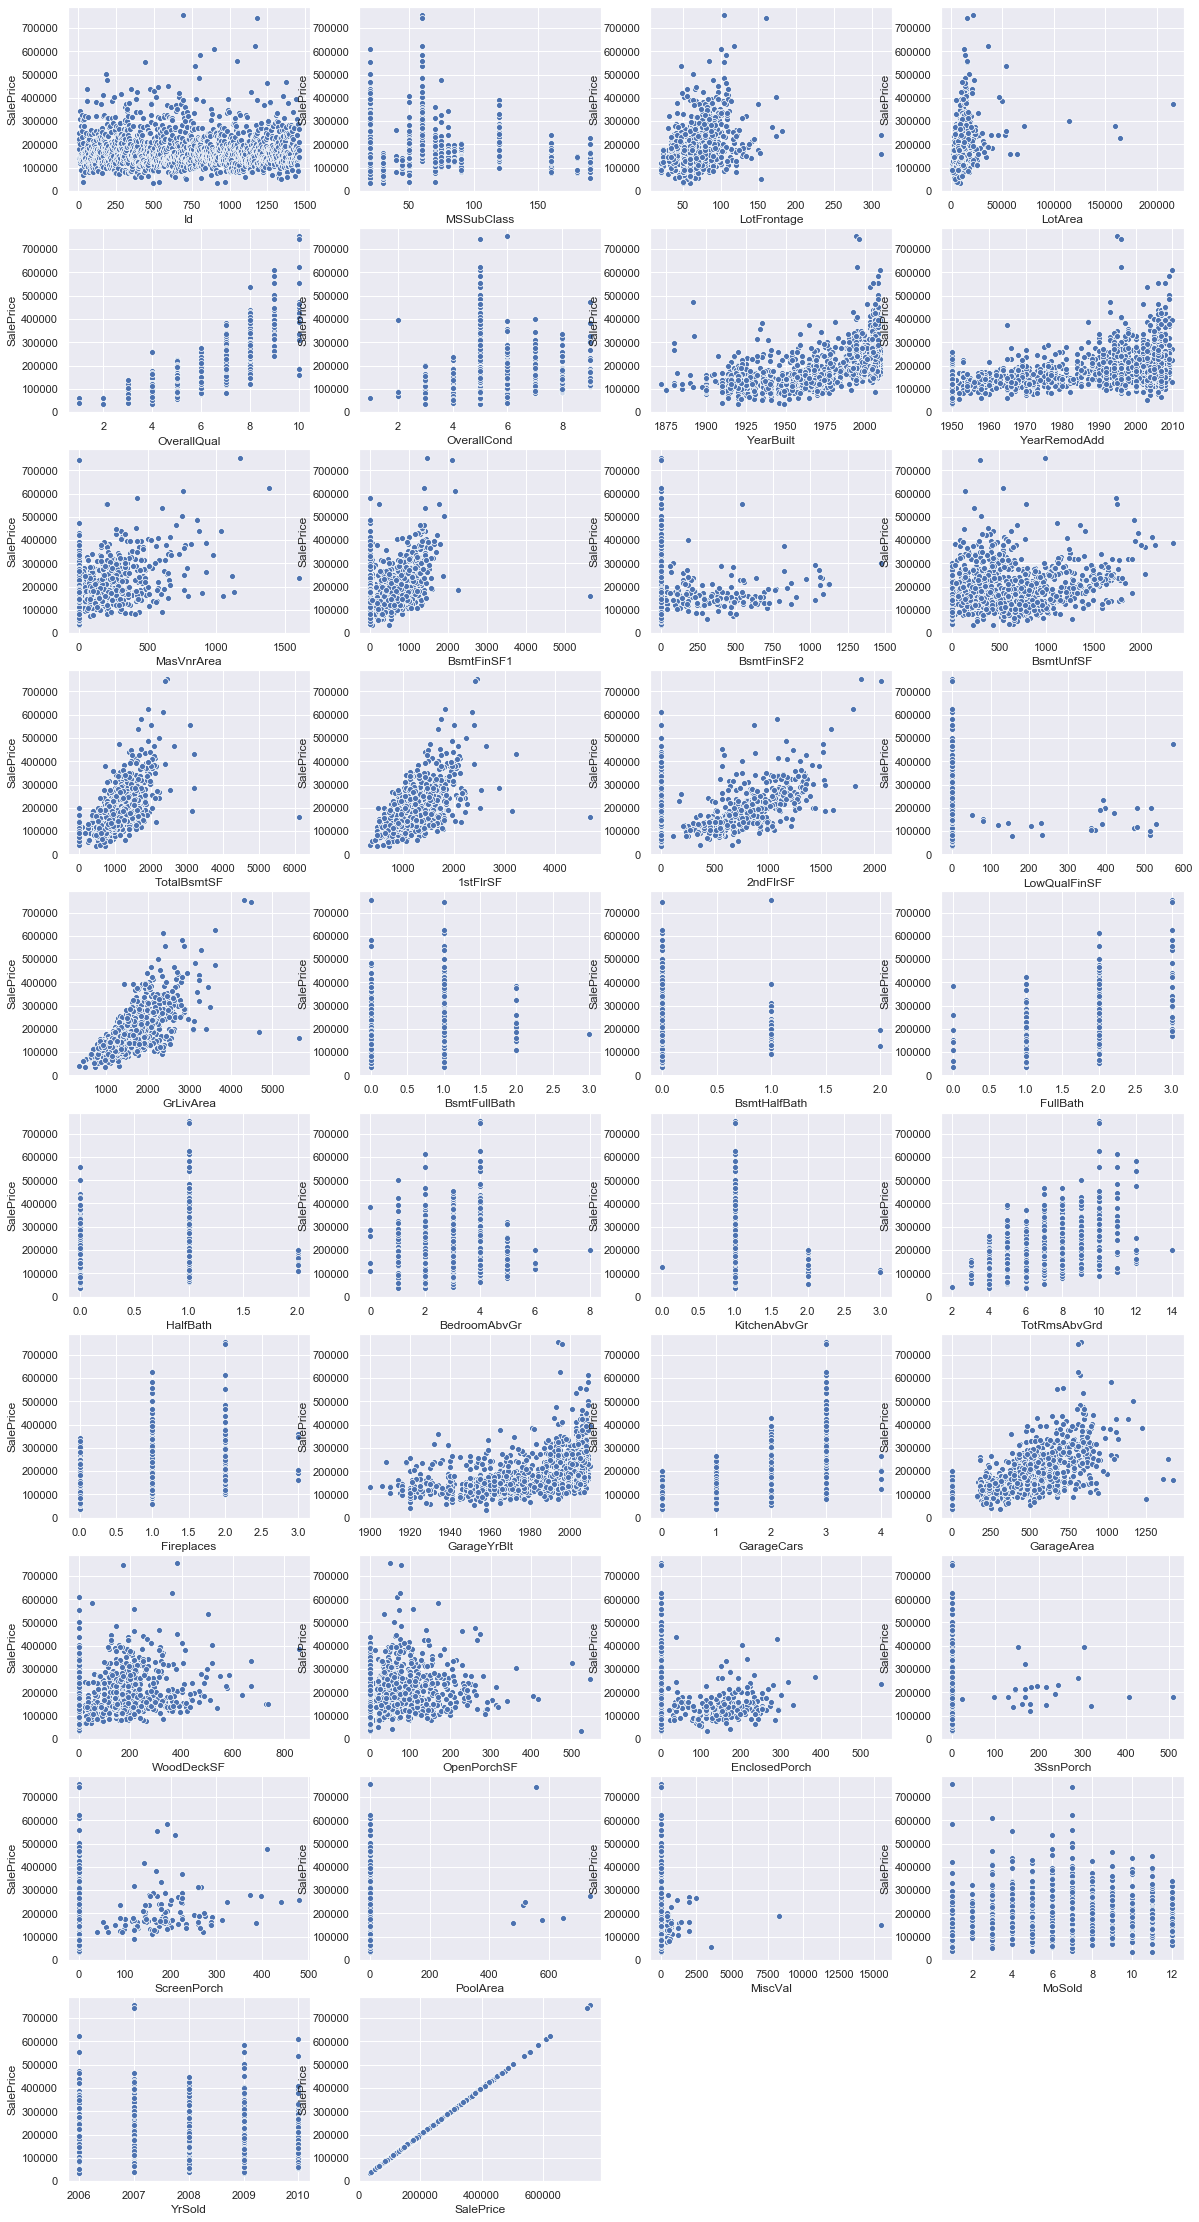

In [1324]:
# now will plot the numerical columns
plt.figure(figsize=(20,40))
sns.set()
for i,var in enumerate(house_num.columns):
    plt.subplot(10,4,i+1)
    sns.scatterplot(x=house_num[var],y=house_num['SalePrice'])
plt.show()

### Heatmap

C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


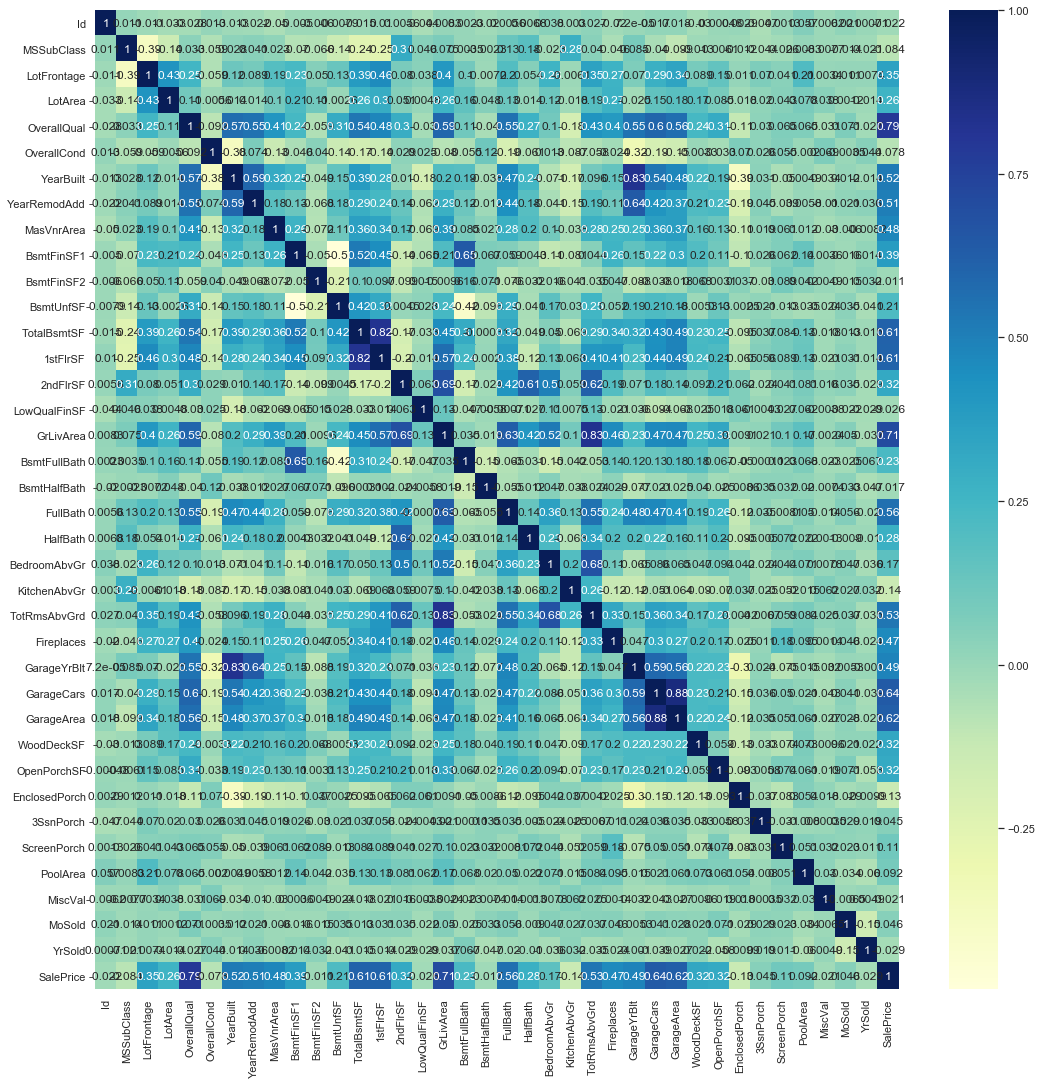

In [1325]:
plt.figure(figsize=(18,18))
ax=sns.heatmap(house_num.corr(),annot=True,cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

### Missing Numerical values

In [1326]:
missing_num_value=[var for var in house_num.columns if house[var].isnull().sum()>0]
missing_num_value

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

we will seee the distribution of these missing variables

### Distplot

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeW

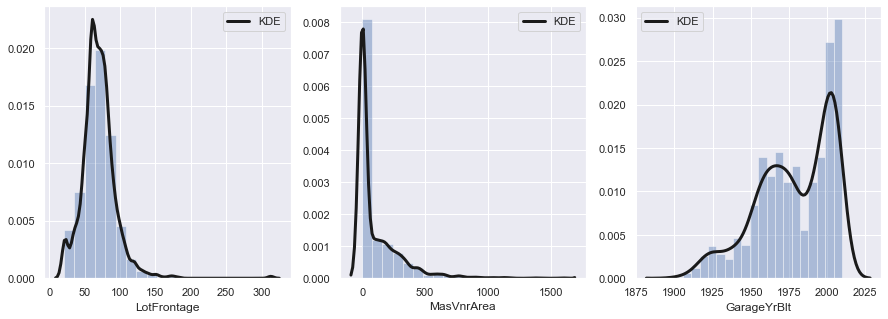

In [1327]:
plt.figure(figsize=(15,5))
sns.set()
for i,var in enumerate(missing_num_value):
    plt.subplot(1,3,i+1)
    sns.distplot(house_num[var],bins=20,kde_kws={"color": "k", "lw": 3, "label": "KDE"},)
plt.show()

From the distplot we can see that 'LotFrontage' we can impute with Mean and 'MasVnrArea', 'GarageYrBlt' we can impute with median because these are skewed so it is better to impute them with median.

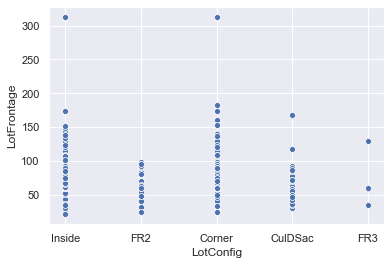

In [1328]:
sns.scatterplot(x=house['LotConfig'],y=house['LotFrontage'])
plt.show()

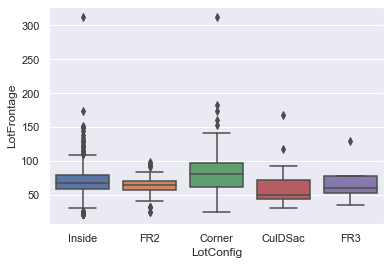

In [1329]:
sns.boxplot(x='LotConfig',y='LotFrontage',data=house)
plt.show()

Not much outlier we can impute- with mean

In [1330]:
# imputing using simpleimputer using strategy as mean
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(house[['LotFrontage']])
house['LotFrontage'] = imr.transform(house[['LotFrontage']]).ravel()

In [1331]:
# checking null values after imputation
house.LotFrontage.isnull().sum()

0

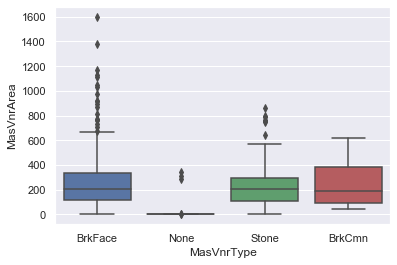

In [1332]:
# checking the distribution
sns.boxplot(x='MasVnrType',y='MasVnrArea',data=house)
plt.show()

In [1333]:
# imputing with median using simpleimputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(house[['MasVnrArea']])
house['MasVnrArea'] = imr.transform(house[['MasVnrArea']]).ravel()

In [1334]:
# checking null after imputing
house.MasVnrArea.isnull().sum()

0

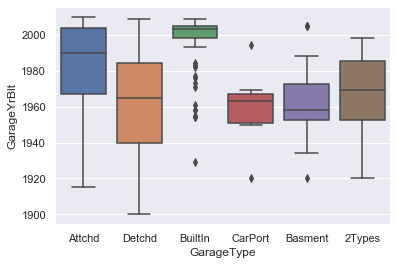

In [1335]:
#imputing with median using simpleimputer
sns.boxplot(x='GarageType',y='GarageYrBlt',data=house)
plt.show()

In [1336]:
# imputing with median using simpleimputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(house[['GarageYrBlt']])
house['GarageYrBlt'] = imr.transform(house[['GarageYrBlt']]).ravel()

In [1337]:
# checking null after imputing
house.GarageYrBlt.isnull().sum()

0

### categorical Variables

In [1338]:
# we see the categorical columns out of our data
house_cat=house.select_dtypes(include=['object'])
house_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [1339]:
# checking the head
house_cat.shape

(1460, 38)

In [1340]:
# missing values in categorical columns
missing_cat_value=[var for var in house_cat.columns if house[var].isnull().sum()>0]
missing_cat_value

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### histplot

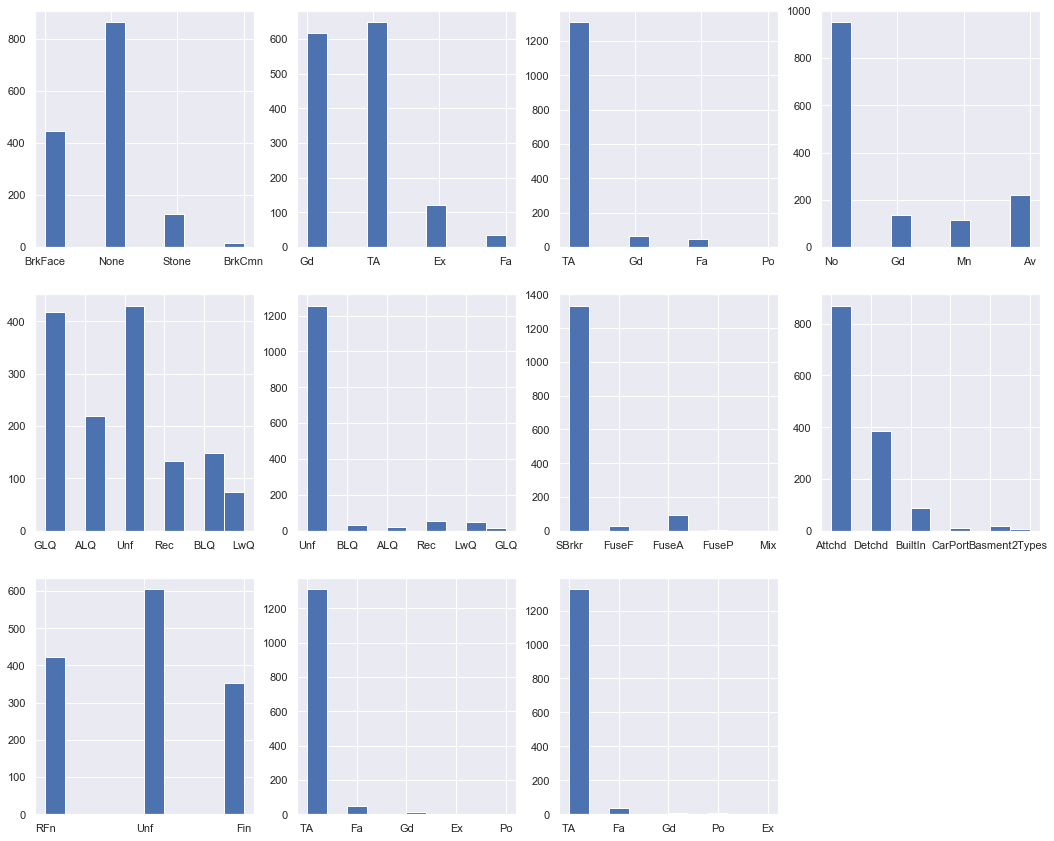

In [1341]:
plt.figure(figsize=(18,20))
sns.set()
for i,var in enumerate(missing_cat_value):
    plt.subplot(4,4,i+1)
    plt.hist(house_cat[var].dropna())
plt.show()

### Boxplot

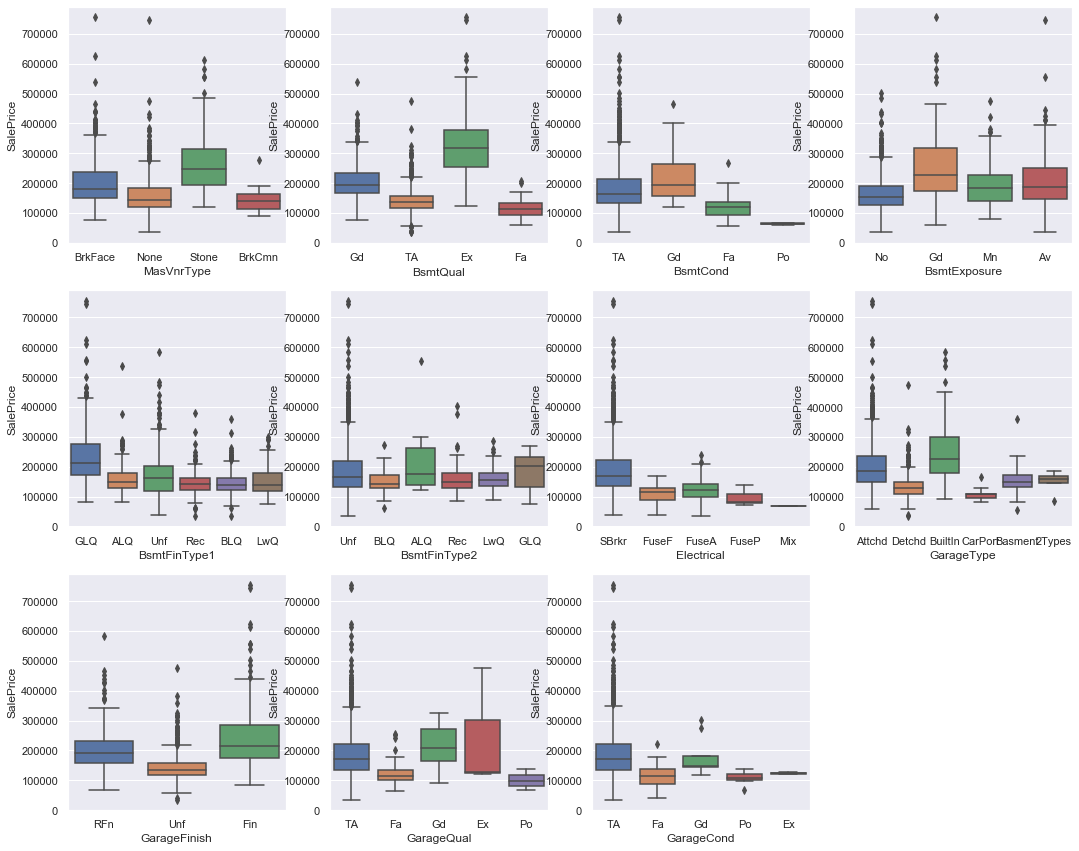

In [1342]:
plt.figure(figsize=(18,20))
sns.set()
for i,var in enumerate(missing_cat_value):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=house_cat[var],y='SalePrice',data=house)
plt.show()

In [1343]:
#8 missing values
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

We will impute this with mode because there are less number of missing values

In [1344]:
# imputation
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(house[['MasVnrType']])
house['MasVnrType'] = imr.transform(house[['MasVnrType']]).ravel()

In [1345]:
# 37 missing values
house.BsmtQual.value_counts

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Evaluates the height of the Basement So here NA refers No basement

In [1346]:
# misssing value imputation
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='No basement')
imr = imr.fit(house[['BsmtQual']])
house['BsmtQual'] = imr.transform(house[['BsmtQual']]).ravel()

In [1347]:
# 37 missing values
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

Evaluates the condition of Basement, So here NA means No Basement and it seems highly skewed so we can drop it

In [1348]:
house.drop("BsmtCond",axis=1,inplace=True)

In [1349]:
# 38 missing values
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

 Refers to walkout or garden level walls so Here NA means No Basement

In [1350]:
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='No basement')
imr = imr.fit(house[['BsmtExposure']])
house['BsmtExposure'] = imr.transform(house[['BsmtExposure']]).ravel()

In [1351]:
# 37 missing values
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Refers To Rating of Basement Finished area

In [1352]:
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='No basement')
imr = imr.fit(house[['BsmtFinType1']])
house['BsmtFinType1'] = imr.transform(house[['BsmtFinType1']]).ravel()

In [1353]:
# 38 missing values
house.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Refers to Rating of basement finished area (if multiple types)

In [1354]:
house.drop("BsmtFinType2",axis=1,inplace=True)

In [1355]:
# 1 missing values
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

refers to Electrical system, So we will impute with mode

In [1356]:
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(house[['Electrical']])
house['Electrical'] = imr.transform(house[['Electrical']]).ravel()

In [1357]:
# 81 missing values
house.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

refers to Garage location where NA refers No Garage

In [1358]:
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='No Garage')
imr = imr.fit(house[['GarageType']])
house['GarageType'] = imr.transform(house[['GarageType']]).ravel()

In [1359]:
# 81 missing values
house.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

refers Interior finish of the garage NA Means No Garage

In [1360]:
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='No Garage')
imr = imr.fit(house[['GarageFinish']])
house['GarageFinish'] = imr.transform(house[['GarageFinish']]).ravel()

In [1361]:
# 81 missing values
house.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

Refers Garage Quality, NA means No Garage

In [1362]:
house.drop("GarageQual",axis=1,inplace=True)

In [1363]:
# 81 missing values
house.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Refers Garage condition, NA means NO Garage this is also highly skewd so we can drop it

In [1364]:
house.drop("GarageCond",axis=1,inplace=True)

In [1365]:
round(100*(house.isnull().sum()/len(house)),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

So we have imputed the null values, We do not have any null values now.

In [1366]:
# after imputation with 0 missing values
house_cat_cleaned=house.select_dtypes(include=['object'])
house_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### Boxplot

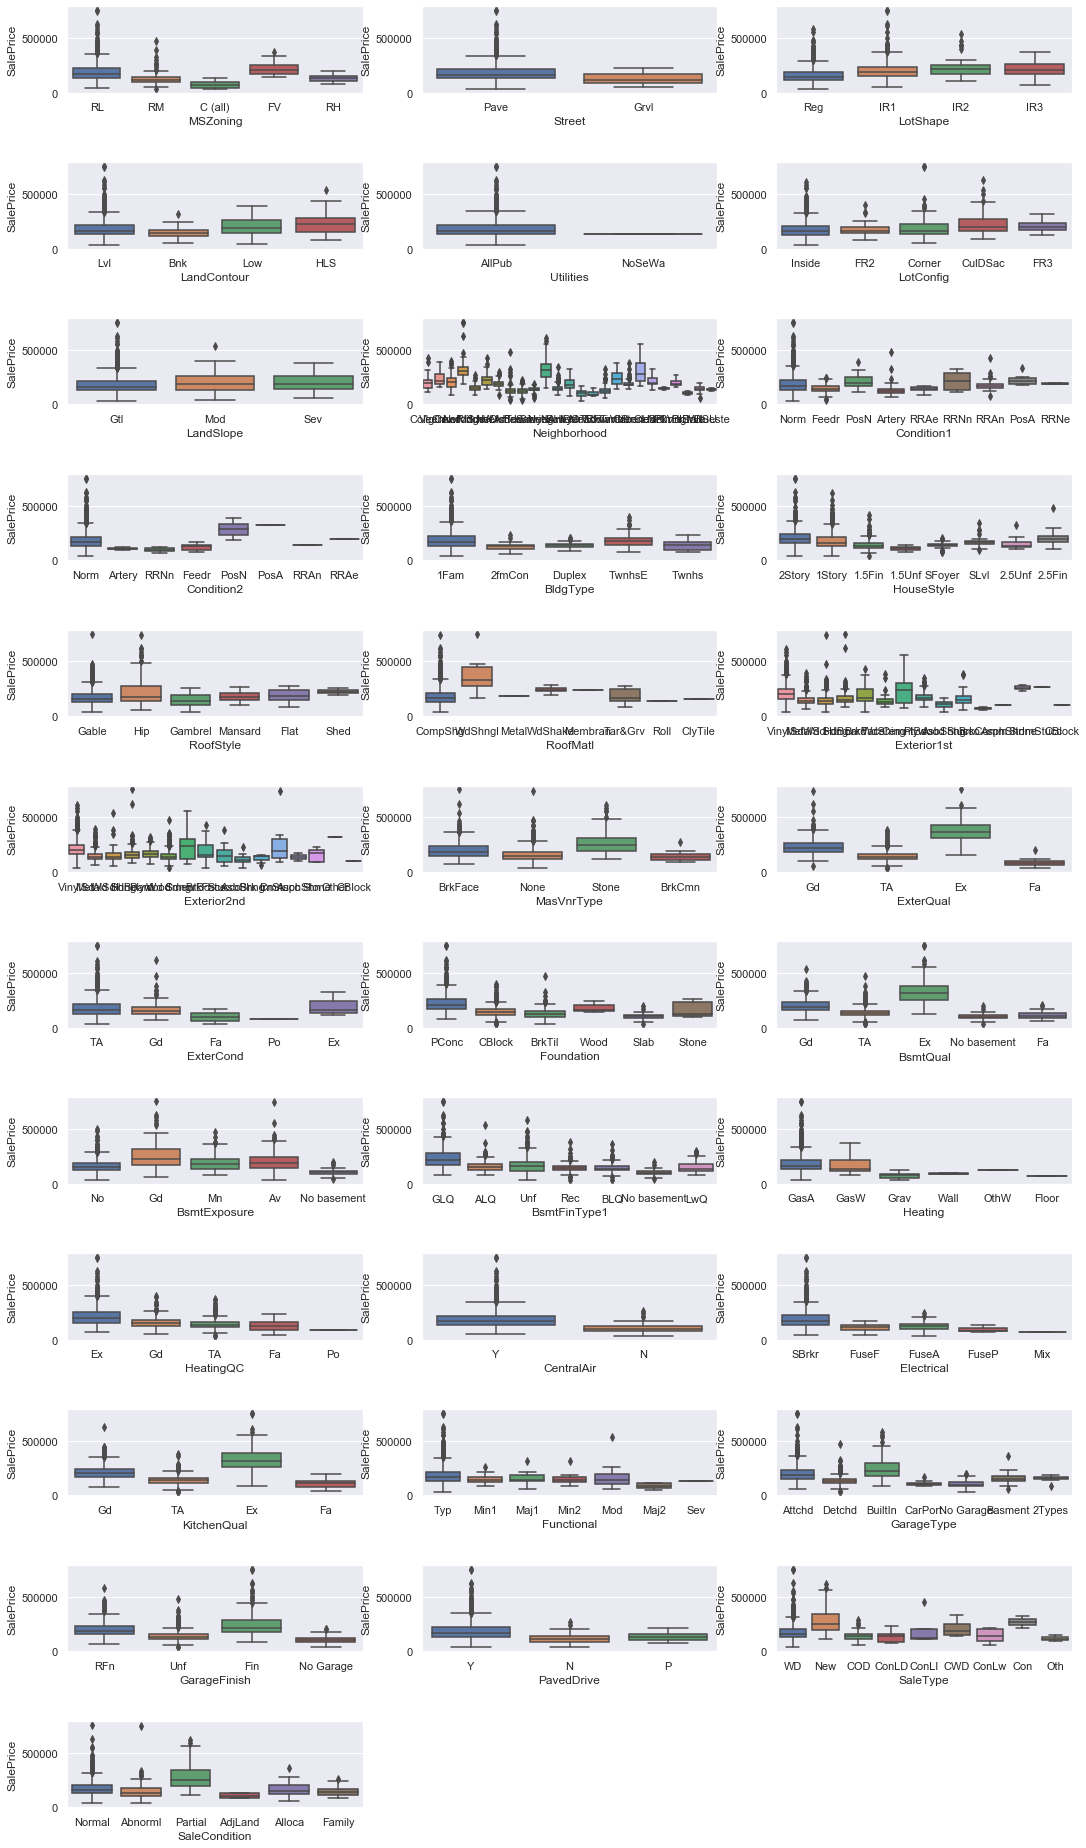

In [1367]:
plt.figure(figsize=(18,36))
sns.set()
for i,var in enumerate(house_cat_cleaned):
    plt.subplot(13,3,i+1)
    sns.boxplot(x=house_cat_cleaned[var],y='SalePrice',data=house)
    plt.subplots_adjust(wspace=0.2, hspace=0.8)

plt.show()

After looking at Boxplot checking some Categorical columns which seem highly skewed

In [1368]:
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Highly skewd so drpping it.

In [1369]:
house.drop("Utilities",axis=1,inplace=True)

In [1370]:
house.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Highly skewed So dropping it

In [1371]:
house.drop("Heating",axis=1,inplace=True)

In [1372]:
house.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

Highly skewed so droping it

In [1373]:
house.drop("RoofMatl",axis=1,inplace=True)

### We have some columns containg year checking these columns and extract some info out of it.

In [1374]:
# year columns
year_columns=['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd']
for i in year_columns:
    house[i]=house[i].apply(lambda x:2020-x if x>0 else x)
    house[i]=house[i].astype(int)

### Heatmap

C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


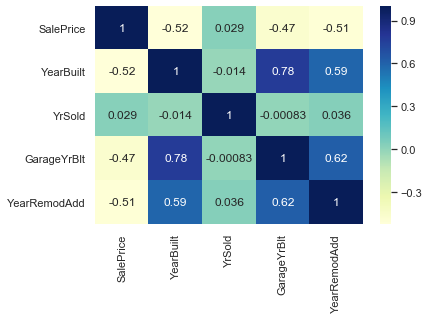

In [1375]:
ax=sns.heatmap(house[['SalePrice','YearBuilt','YrSold','GarageYrBlt','YearRemodAdd']].corr(),annot=True,cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

Dropping "Yrsold" and "YearBuilt" as these are highly correlated (neg and pos respectively)

In [1376]:
house.drop("YrSold",axis=1,inplace=True)
house.drop("YearBuilt",axis=1,inplace=True)

# Target Variable

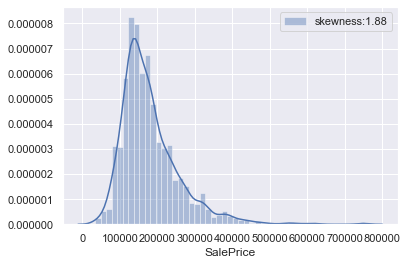

In [1377]:
sp=sns.distplot(house['SalePrice'])
sp.legend(["skewness:{:.2f}".format(house['SalePrice'].skew())])
plt.show()

We need to transform our Traget Variable so that it become more gaussian.

In [1378]:
house["SalePrice"] = np.log1p(house["SalePrice"])

# Data Preparation

In [1379]:
# after cleaning
house_cat_cleaned=house.select_dtypes(include=['object'])
house_cat_cleaned.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,Y,WD,Normal


### One hot encoding

In [1380]:
house_cat_dummies = pd.get_dummies(house_cat_cleaned, drop_first=True)
house_cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0

Dropping original columns

In [1381]:
house = house.drop(list(house_cat_cleaned.columns), axis=1)

Concatenating with Original dataset

In [1382]:
house = pd.concat([house, house_cat_dummies], axis=1)

In [1383]:
house.shape

(1460, 208)

So finally we are left with 208 columns

### Splitting in X and y

In [1384]:
X=house.drop(['SalePrice','Id'],axis=1)
y=house['SalePrice']

In [1385]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,17,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,17,2,548,0,61,0,0,0,0,0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,44,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,44,2,460,298,0,0,0,0,0,0,5,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [1386]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Scaling

In [1387]:
# scaling the features
from sklearn.preprocessing import RobustScaler

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
scaler=RobustScaler()
scaler.fit(X)

RobustScaler()

I am using robust scaler because it works well with outliers

### Train Test Split

In [1388]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# RFE

In [1389]:
# instantiate
lm=LinearRegression()

In [1390]:
# fit
lm.fit(X_train,y_train)

LinearRegression()

In [1391]:
# doing RFE Selection
rfe=RFE(lm,25)
rfe.fit(X_train,y_train)

C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RFE(estimator=LinearRegression(), n_features_to_select=25)

In [1392]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 167),
 ('LotFrontage', False, 169),
 ('LotArea', False, 177),
 ('OverallQual', True, 1),
 ('OverallCond', False, 73),
 ('YearRemodAdd', False, 163),
 ('MasVnrArea', False, 176),
 ('BsmtFinSF1', False, 52),
 ('BsmtFinSF2', False, 53),
 ('BsmtUnfSF', False, 54),
 ('TotalBsmtSF', False, 55),
 ('1stFlrSF', False, 40),
 ('2ndFlrSF', False, 41),
 ('LowQualFinSF', False, 39),
 ('GrLivArea', False, 38),
 ('BsmtFullBath', False, 49),
 ('BsmtHalfBath', False, 92),
 ('FullBath', False, 50),
 ('HalfBath', False, 59),
 ('BedroomAbvGr', False, 122),
 ('KitchenAbvGr', False, 16),
 ('TotRmsAbvGrd', False, 153),
 ('Fireplaces', False, 104),
 ('GarageYrBlt', False, 175),
 ('GarageCars', False, 42),
 ('GarageArea', False, 178),
 ('WoodDeckSF', False, 173),
 ('OpenPorchSF', False, 174),
 ('EnclosedPorch', False, 171),
 ('3SsnPorch', False, 170),
 ('ScreenPorch', False, 172),
 ('PoolArea', False, 166),
 ('MiscVal', False, 179),
 ('MoSold', False, 162),
 ('MSZoning_FV', True, 1),
 ('M

In [1393]:
#columns that RFE is supportiing
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_Veenker', 'Condition1_PosA', 'Condition2_PosA',
       'Condition2_PosN', 'Exterior1st_BrkComm', 'ExterCond_Fa',
       'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No basement', 'BsmtQual_TA', 'BsmtFinType1_No basement',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_ConLD'],
      dtype='object')

In [1394]:
#columns that RFE does not support.
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=181)

# Ridge

In [1395]:
# ridge regression
rr = Ridge(alpha=0.001)
rr.fit(X_train[col], y_train)

# predict
y_train_pred = rr.predict(X_train[col])
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rr.predict(X_test[col])
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.7781181401374713
0.7470411053698388


In [1396]:
# lasso regression
lr = Lasso(alpha=0.001)
lr.fit(X_train[col], y_train)

# predict
y_train_pred = lr.predict(X_train[col])
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lr.predict(X_test[col])
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.7558386388385424
0.7502633978858024


#### So Using RFE My Accuracy on Ridge and Lasso was low so I decided to go with all the variables Without using RFE.

# Without Using RFE

# RIDGE

In [1397]:
# ridge regression
rr = Ridge(alpha=0.001)
rr.fit(X_train, y_train)

# predict
y_train_pred = rr.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rr.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9338262999989512
0.8676961219007648


In [1398]:
# Ridge model parameters
model_parameters = list(rr.coef_)
model_parameters.insert(0, rr.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.266),
 ('MSSubClass', -0.0),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.049),
 ('OverallCond', 0.029),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.044),
 ('BsmtHalfBath', 0.019),
 ('FullBath', 0.034),
 ('HalfBath', 0.025),
 ('BedroomAbvGr', 0.017),
 ('KitchenAbvGr', -0.064),
 ('TotRmsAbvGrd', 0.004),
 ('Fireplaces', 0.02),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.063),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.001),
 ('MSZoning_FV', 0.419),
 ('MSZoning_RH', 0.429),
 ('MSZoning_RL', 0.429),
 ('MSZoning_RM', 0.387),
 ('Street_Pave', 0.084),
 ('LotShape_IR2', 0.017),
 ('LotShape_IR3', -0.133),
 ('LotShape_Reg

In [1399]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# ridge model
ridge = Ridge()
ridge_regressor = GridSearchCV(estimator = ridge, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
ridge_regressor.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1400]:
cv_results = pd.DataFrame(ridge_regressor.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016791,0.001938,0.007595,0.001018,0.0001,{'alpha': 0.0001},0.786100,0.849773,0.804799,0.543259,0.881572,0.773101,0.119704,26,0.942350,0.932751,0.941779,0.956442,0.935341,0.941733,0.008225
1,0.020588,0.004028,0.007994,0.002189,0.001,{'alpha': 0.001},0.786259,0.849901,0.805098,0.543426,0.881620,0.773261,0.119685,25,0.942350,0.932750,0.941779,0.956442,0.935341,0.941733,0.008225
2,0.016391,0.001355,0.007995,0.001264,0.01,{'alpha': 0.01},0.787737,0.851093,0.808008,0.545054,0.882071,0.774793,0.119483,24,0.942342,0.932746,0.941773,0.956436,0.935335,0.941726,0.008225
3,0.015392,0.000799,0.006195,0.000399,0.05,{'alpha': 0.05},0.792784,0.855077,0.818909,0.551774,0.883582,0.780425,0.118431,23,0.942206,0.932666,0.941652,0.956328,0.935232,0.941617,0.008218
4,0.016591,0.001958,0.006996,0.001095,0.1,{'alpha': 0.1},0.797272,0.858383,0.828648,0.559235,0.884724,0.785652,0.116922,22,0.941923,0.932491,0.941367,0.956077,0.934995,0.941370,0.008199


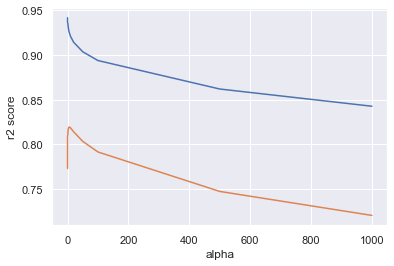

In [1401]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [1402]:
# Best parameter
ridge_regressor.best_params_

{'alpha': 6.0}

In [1403]:
# ridge regression with optimal alpha
rr_mod = Ridge(alpha=6)
rr_mod.fit(X_train, y_train)

# predict
y_train_pred = rr_mod.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rr_mod.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9195713431836999
0.8871516018902207


### Top 5 and Bottom 5 features

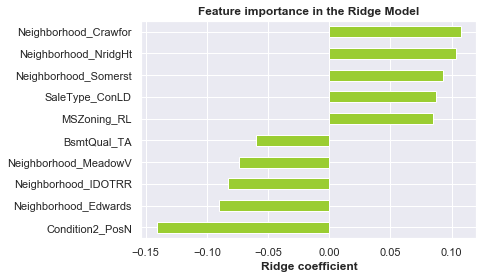

In [1404]:
coefs = pd.Series(rr_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(5),
                     coefs.sort_values().tail(5)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Ridge coefficient", weight='bold')
plt.title("Feature importance in the Ridge Model", weight='bold')
plt.show()

In [1405]:
# ridge regression with  double of optimal alpha for Q1 of subjective Question
rr_mod = Ridge(alpha=12)
rr_mod.fit(X_train, y_train)

# predict
y_train_pred = rr_mod.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rr_mod.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9145703540635661
0.8866817532758552


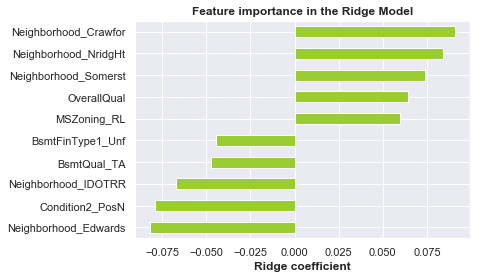

In [1406]:
# coefficient after doubling alpha
coefs = pd.Series(rr_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(5),
                     coefs.sort_values().tail(5)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Ridge coefficient", weight='bold')
plt.title("Feature importance in the Ridge Model", weight='bold')
plt.show()

# Lasso

In [1407]:
# lasso regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9032773685513644
0.8803706508929537


In [1408]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.62),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.071),
 ('OverallCond', 0.033),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.054),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.026),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', 0.01),
 ('KitchenAbvGr', -0.019),
 ('TotRmsAbvGrd', 0.006),
 ('Fireplaces', 0.03),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.058),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.001),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('MSZoning_FV', 0.005),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.057),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 

In [1409]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# lasso model
model = Lasso()
lasso_regressor = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
lasso_regressor.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1410]:
lasso_regressor.best_score_

0.7999301518763935

In [1411]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [1412]:
lasso_regressor.best_estimator_

Lasso(alpha=0.001)

In [1413]:
cv_results = pd.DataFrame(lasso_regressor.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155946,0.041084,0.007393,0.001020,0.0001,{'alpha': 0.0001},0.804267,0.865845,0.850998,0.563523,0.890235,0.794974,0.119073,2,0.939934,0.930129,0.939093,0.954131,0.932173,0.939092,0.008427
1,0.035579,0.004268,0.007396,0.000801,0.001,{'alpha': 0.001},0.785666,0.870626,0.854621,0.602565,0.886172,0.799930,0.104483,1,0.910956,0.905524,0.907683,0.930206,0.907056,0.912285,0.009134
2,0.022188,0.001163,0.006796,0.000748,0.01,{'alpha': 0.01},0.693054,0.824540,0.810520,0.516760,0.845813,0.738137,0.122751,3,0.849084,0.845633,0.840258,0.870096,0.838790,0.848772,0.011285
3,0.029385,0.015413,0.007195,0.000979,0.05,{'alpha': 0.05},0.635905,0.795962,0.782460,0.440716,0.828166,0.696642,0.144024,4,0.817421,0.813812,0.811141,0.842325,0.806361,0.818212,0.012585
4,0.040573,0.010841,0.006796,0.001166,0.1,{'alpha': 0.1},0.592866,0.756960,0.732671,0.363461,0.794004,0.647993,0.157709,14,0.785064,0.771546,0.765124,0.812756,0.759151,0.778728,0.019068


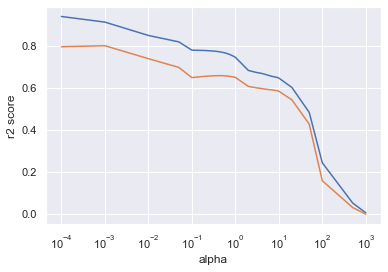

In [1414]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [1415]:
# model with optimal alpha
# lasso regression
lasso_mod = Lasso(alpha=0.001)
lasso_mod.fit(X_train, y_train)

# predict
y_train_pred = lasso_mod.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_mod.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9032773685513644
0.8803706508929537


### Top 5 and Bottom 5 features

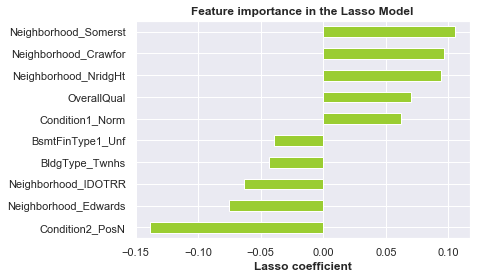

In [1416]:
# Coeff for optimal Alpha
coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(5),
                     coefs.sort_values().tail(5)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [1417]:
# Top 5 coeff.
coefs.sort_values(ascending=False).head(5)

Neighborhood_Somerst    0.105145
Neighborhood_Crawfor    0.096954
Neighborhood_NridgHt    0.093879
OverallQual             0.070511
Condition1_Norm         0.062562
dtype: float64

In [1418]:
# model with  double of optimal alpha for Q1 of subjective question
# lasso regression
lasso_mod = Lasso(alpha=0.002)
lasso_mod.fit(X_train, y_train)

# predict
y_train_pred = lasso_mod.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_mod.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8885355519847998
0.8718611027846681


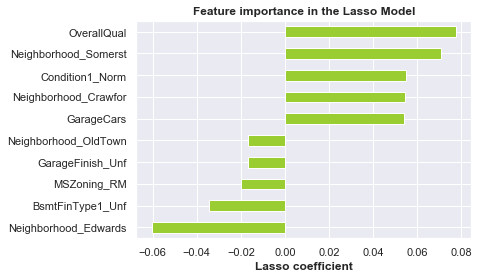

In [1419]:
# coeff after doubling alpha
coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(5),
                     coefs.sort_values().tail(5)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

# Solution for Q3 subjective Question
X=X.drop(['Neighborhood_Somerst','Neighborhood_Crawfor','Neighborhood_NridgHt','OverallQual','Condition1_Norm'],axis=1)
X_train=X_train.drop(['Neighborhood_Somerst','Neighborhood_Crawfor','Neighborhood_NridgHt','OverallQual','Condition1_Norm'],axis=1)
X_test=X_test.drop(['Neighborhood_Somerst','Neighborhood_Crawfor','Neighborhood_NridgHt','OverallQual','Condition1_Norm'],axis=1)
lasso_mod = Lasso(alpha=0.001)
lasso_mod.fit(X_train, y_train)


y_train_pred = lasso_mod.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_mod.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs= pd.concat([coefs.sort_values().head(5),
                     coefs.sort_values().tail(5)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

# Thank You for Reading